In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../../dataset/telecom_churn.csv')

In [3]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

C:\Users\yadav\AppData\Local\Temp\ipykernel_8384\1943404376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


Text(0.5, 1.0, 'Distribution of Churn')

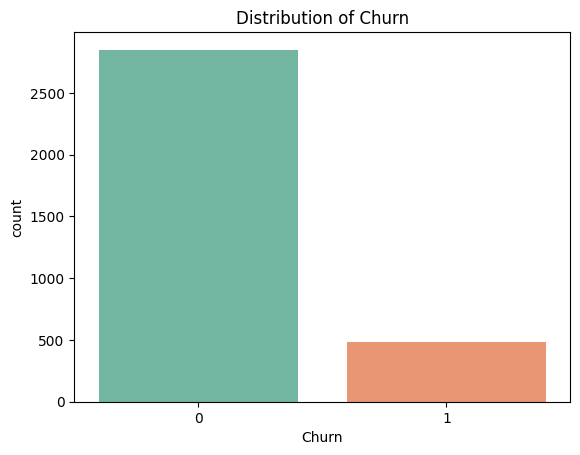

In [9]:
# data visualization
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribution of Churn')

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

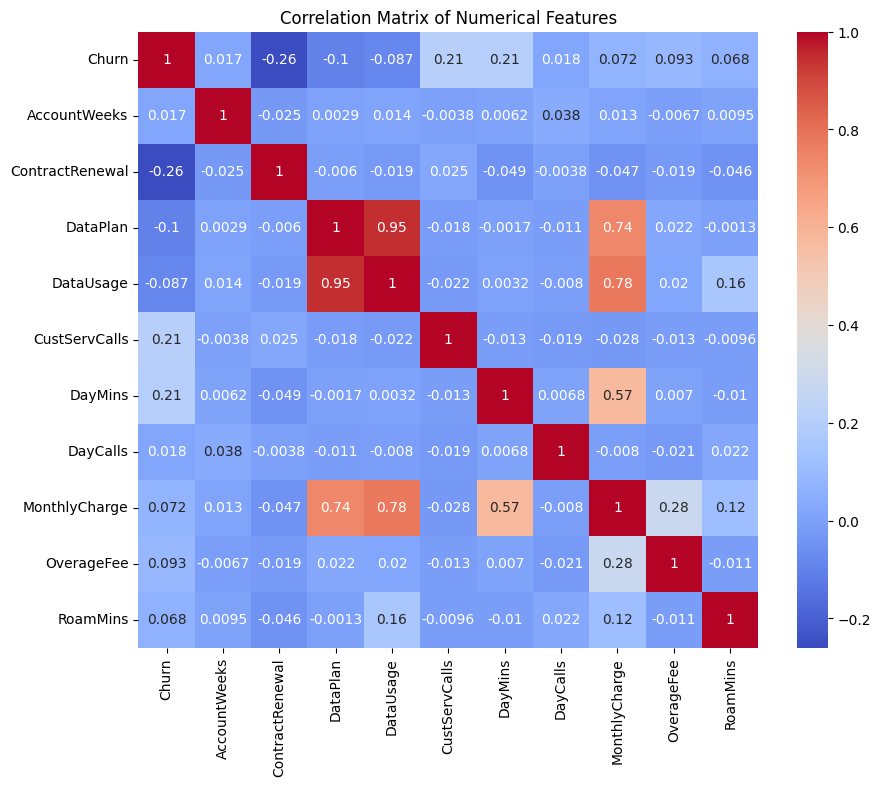

In [10]:
# find the correlation between numerical features and the target variable
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True,  cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')


C:\Users\yadav\AppData\Local\Temp\ipykernel_8384\262862122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='Set2')


Text(0, 0.5, 'Average Customer Service Calls')

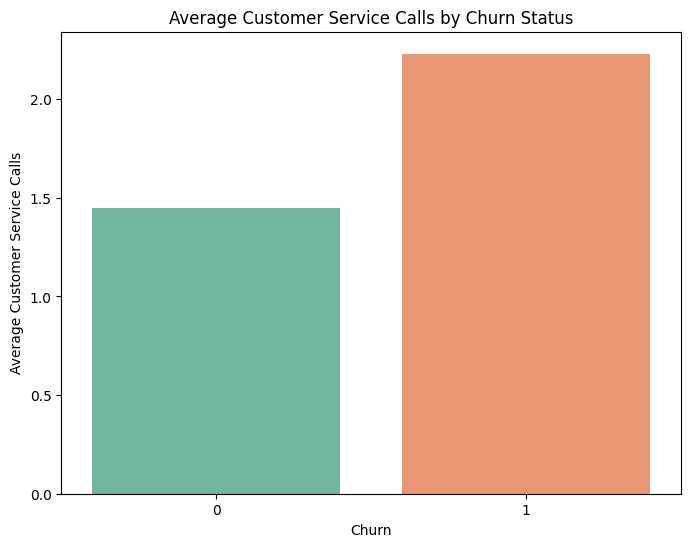

In [12]:
churn_rate = df.groupby("Churn")["CustServCalls"].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='Set2')
plt.title('Average Customer Service Calls by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Average Customer Service Calls')

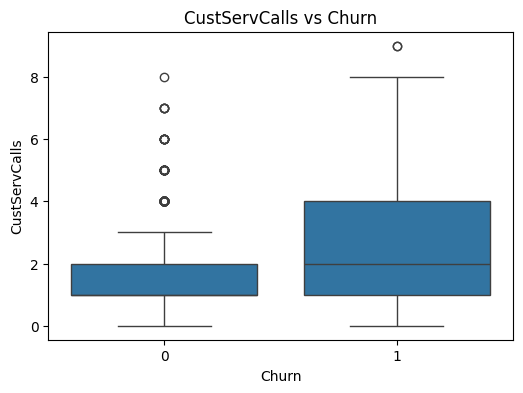

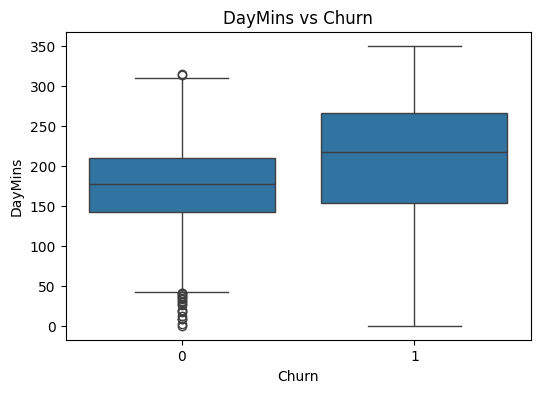

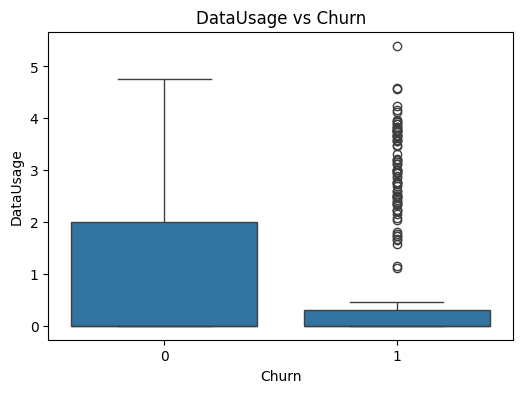

In [13]:
num_cols = ['CustServCalls', 'DayMins', 'DataUsage']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


In [15]:
x=df.drop('Churn', axis=1)
y = df['Churn']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)



In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [25]:
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)

lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.78      0.86       566
           1       0.40      0.80      0.53       101

    accuracy                           0.79       667
   macro avg       0.68      0.79      0.70       667
weighted avg       0.87      0.79      0.81       667

[[444 122]
 [ 20  81]]
Accuracy: 0.7871064467766117


In [28]:
# using random forest classifier to see the performance
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.86      0.59      0.70       101

    accuracy                           0.92       667
   macro avg       0.89      0.79      0.83       667
weighted avg       0.92      0.92      0.92       667

[[556  10]
 [ 41  60]]
Accuracy: 0.9235382308845578
